# Analysis of economical data regarding Great Recession

Files raw_data_1.csv, raw_data_2.csv and raw_data_3.xlsx contain data downloaded from:</br>
https://databank.worldbank.org/,</br>
https://unstats.un.org/UNSDWebsite/,</br>
https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups.

The analysis will focus on finding differences between continents and countries income group. The data was turned from detailed data to distribution series. Mostly as a means to train analysis coding skills when the detailed data is not available.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display options
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
rawdata1 = pd.read_csv('raw_data_1.csv',na_values='..',nrows=217)
rawdata2 = pd.read_csv('raw_data_2.csv',sep=';')
data3 = pd.read_excel("raw_data_3.xlsx",sheet_name="Country Analytical History",usecols="A,X",skiprows=10,skipfooter=11,na_values="..")
data3.columns = ["Country Code", "Income Group"]
data3 = data3.set_index('Country Code')
data2 = rawdata2.loc[:,['Country or Area','Region Name','ISO-alpha3 Code']].rename(columns={'ISO-alpha3 Code':'Country Code'}).set_index('Country Code')
data1 = rawdata1.loc[:,['Country Code','2006 [YR2006]','2007 [YR2007]','2008 [YR2008]','2009 [YR2009]','2010 [YR2010]','2011 [YR2011]']].set_index('Country Code')
recession_data_1=pd.concat([data2,data3,data1],axis=1)
recession_data_1=recession_data_1.where(recession_data_1['Country or Area']!='Libya').dropna() \
.rename(columns={'Country or Area':'Country Name','Region Name':'Region Name','2006 [YR2006]':'2006','2007 [YR2007]':'2007','2008 [YR2008]':'2008','2009 [YR2009]':'2009','2010 [YR2010]':'2010','2011 [YR2011]':'2011'}) \
.replace({'Income Group':{'L':'Low','LM':'Lower middle','UM':'Upper middle','H':'High'}})
#separating of americas into north america and south america
northcodes = ['ATG','BHS','BRB','BLZ','CAN','CRI','CUB','DMA','DOM','SLV','GRD'
              ,'GTM','HTI','HND','JAM','MEX','NIC','PAN','KNA','LCA','VCT','TTO','USA']
temp = recession_data_1
temp.loc[temp.index.isin(northcodes),'Region Name'] = "North America"
temp=temp.replace("Americas","South America")
recession_data_1 = temp

First table (`recession_table_1`) includes frequency distribution for all data by year.
Index:
 - Year (wszystkie lata)

Columns:
 - Interval Index (-20, -15]	(-15, -10] ... (30, 35]

Second table (`recession_table_2`) includes intervals constructed for each geographic region and year
Index:
 - 1 level: Region Name
 - 2 level: Year

Columns:
 - Intervals

Third table (`recession_table_3`) includes intervals constructed for each income group and year
Index:
 - 1 level: Income Group
 - 2 level: Year

Columns:
 - Intervals

In [4]:
years = ["2006","2007",'2008','2009','2010','2011']
intervals=pd.interval_range(start=-20,end=35,freq=5)

In [5]:
recession_table_1 = pd.DataFrame(columns=intervals)
for i in years:
    a = list(map(lambda x: intervals.contains(x).astype(int), recession_data_1[i]))
    b = pd.DataFrame(a,columns=intervals).sum()/len(a)
    recession_table_1.loc[i] = b
recession_table_1 = recession_table_1.rename_axis('Year')
recession_table_1

,"(-20, -15]","(-15, -10]","(-10, -5]","(-5, 0]","(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
Year,,,,,,,,,,,
2006,0.00,0.00,0.01,0.08,0.36,0.47,0.07,0.01,0.00,0.01,0.01
2007,0.00,0.00,0.01,0.03,0.39,0.45,0.09,0.02,0.01,0.00,0.00
2008,0.01,0.01,0.03,0.13,0.45,0.32,0.05,0.01,0.00,0.00,0.00
2009,0.01,0.05,0.13,0.30,0.34,0.14,0.03,0.00,0.01,0.00,0.00
2010,0.00,0.00,0.03,0.09,0.45,0.36,0.06,0.01,0.01,0.01,0.00
2011,0.00,0.01,0.03,0.09,0.48,0.34,0.04,0.01,0.01,0.00,0.00


In [7]:
recRegions=['Region Name']
recRegions.extend(years)

groupsRegio=recession_data_1.groupby('Region Name').count()
regionName=groupsRegio.index.values.tolist()
counts=groupsRegio['2006'].tolist()

regions=recession_data_1.loc[:,recRegions]
regions[years]=regions[years].applymap(lambda g: intervals.contains(g).astype(int))
regions=regions.groupby('Region Name').sum()
regions=regions.stack()
regions=pd.DataFrame(regions,columns=['temp'])

for n in range(len(counts)):
    regions['temp'][regionName[n]]=regions['temp'][regionName[n]]/counts[n]
    
multiIDX=regions.index.tolist()

recession_table_2 = pd.DataFrame(regions["temp"].values.tolist(),columns=intervals)
recession_table_2.index=pd.MultiIndex.from_tuples(multiIDX, names=["Region", "Year"])
recession_table_2

(-20, -15]  (-15, -10]  (-10, -5]  (-5, 0]  (0, 5]  \
Region        Year                                                       
Africa        2006        0.00        0.00       0.00     0.08    0.32   
              2007        0.00        0.00       0.02     0.06    0.38   
              2008        0.02        0.00       0.02     0.06    0.40   
              2009        0.00        0.02       0.00     0.14    0.56   
              2010        0.00        0.00       0.02     0.00    0.38   
              2011        0.00        0.00       0.04     0.04    0.44   
Asia          2006        0.00        0.00       0.00     0.04    0.20   
              2007        0.00        0.00       0.00     0.00    0.20   
              2008        0.00        0.00       0.00     0.04    0.43   
              2009        0.00        0.02       0.08     0.18    0.35   
              2010        0.00        0.00       0.00     0.04    0.20   
              2011        0.00        0.02       0.00     0.00    0.37   
Europe        2006        0.00        0.00       0.00     0.00    0.49   
              2007        0.00        0.00       0.00     0.00    0.42   
              2008        0.00        0.00       0.05     0.21    0.49   
              2009        0.02        0.12       0.33     0.44    0.09   
              2010        0.00        0.00       0.05     0.12    0.72   
              2011        0.00        0.02       0.02     0.09    0.70   
North America 2006        0.00        0.00       0.00     0.04    0.48   
              2007        0.00        0.00       0.00     0.00    0.57   
              2008        0.00        0.00       0.00     0.17    0.70   
              2009        0.00        0.04       0.13     0.61    0.17   
              2010        0.00        0.00       0.09     0.17    0.57   
              2011        0.00        0.00       0.00     0.26    0.57   
Oceania       2006        0.00        0.00       0.06     0.44    0.38   
              2007        0.00        0.00       0.06     0.12    0.75   
              2008        0.00        0.06       0.12     0.38    0.31   
              2009        0.06        0.00       0.12     0.31    0.44   
              2010        0.00        0.00       0.00     0.12    0.62   
              2011        0.00        0.00       0.12     0.12    0.56   
South America 2006        0.00        0.00       0.00     0.06    0.41   
              2007        0.00        0.00       0.00     0.06    0.35   
              2008        0.00        0.00       0.00     0.12    0.41   
              2009        0.00        0.06       0.18     0.29    0.47   
              2010        0.00        0.00       0.00     0.24    0.35   
              2011        0.00        0.00       0.06     0.18    0.24   

                    (5, 10]  (10, 15]  (15, 20]  (20, 25]  (25, 30]  (30, 35]  
Region        Year                                                             
Africa        2006     0.52      0.06      0.02      0.00      0.00      0.00  
              2007     0.44      0.06      0.04      0.00      0.00      0.00  
              2008     0.42      0.06      0.02      0.00      0.00      0.00  
              2009     0.24      0.04      0.00      0.00      0.00      0.00  
              2010     0.50      0.08      0.00      0.02      0.00      0.00  
              2011     0.42      0.06      0.00      0.00      0.00      0.00  
Asia          2006     0.55      0.14      0.00      0.00      0.04      0.02  
              2007     0.53      0.20      0.04      0.02      0.00      0.00  
              2008     0.43      0.08      0.02      0.00      0.00      0.00  
              2009     0.27      0.08      0.00      0.02      0.00      0.00  
              2010     0.61      0.10      0.02      0.00      0.02      0.00  
              2011     0.51      0.06      0.02      0.02      0.00      0.00  
Europe        2006     0.49      0.02      0.00      0.00      0.00      0.00  
       

In [8]:
colIncome=['Income Group']
colIncome.extend(years)

groups=recession_data_1.groupby('Income Group').count()
incomeGroup=groups.index.values.tolist()
countsIncome=groups['2006'].tolist()

income=recession_data_1.loc[:,colIncome]
income[years]=income[years].applymap(lambda g: intervals.contains(g).astype(int))
income=income.groupby('Income Group').sum()
income=income.stack()
income=pd.DataFrame(income,columns=['temp'])

for n in range(len(countsIncome)):
    income['temp'][incomeGroup[n]]=income['temp'][incomeGroup[n]]/countsIncome[n]
    
multiIDXIncome=income.index.tolist()

recession_table_3 = pd.DataFrame(income["temp"].values.tolist(),columns=intervals)
recession_table_3.index=pd.MultiIndex.from_tuples(multiIDXIncome, names=["Income Group", "Year"])
recession_table_3

(-20, -15]  (-15, -10]  (-10, -5]  (-5, 0]  (0, 5]  \
Income Group Year                                                       
High         2006        0.00        0.00       0.02     0.05    0.52   
             2007        0.00        0.00       0.02     0.02    0.58   
             2008        0.00        0.02       0.03     0.27    0.57   
             2009        0.02        0.08       0.27     0.43    0.17   
             2010        0.00        0.00       0.07     0.15    0.62   
             2011        0.00        0.02       0.07     0.17    0.58   
Low          2006        0.00        0.00       0.00     0.07    0.37   
             2007        0.00        0.00       0.00     0.07    0.37   
             2008        0.02        0.00       0.02     0.02    0.34   
             2009        0.00        0.00       0.00     0.05    0.49   
             2010        0.00        0.00       0.02     0.02    0.24   
             2011        0.00        0.02       0.02     0.00    0.32   
Lower middle 2006        0.00        0.00       0.00     0.09    0.28   
             2007        0.00        0.00       0.02     0.02    0.38   
             2008        0.00        0.00       0.02     0.08    0.40   
             2009        0.02        0.02       0.06     0.23    0.45   
             2010        0.00        0.00       0.00     0.02    0.43   
             2011        0.00        0.00       0.02     0.08    0.49   
Upper middle 2006        0.00        0.00       0.00     0.09    0.23   
             2007        0.00        0.00       0.00     0.02    0.18   
             2008        0.00        0.00       0.02     0.11    0.48   
             2009        0.00        0.07       0.16     0.43    0.32   
             2010        0.00        0.00       0.00     0.14    0.43   
             2011        0.00        0.00       0.00     0.07    0.50   

                   (5, 10]  (10, 15]  (15, 20]  (20, 25]  (25, 30]  (30, 35]  
Income Group Year                                                             
High         2006     0.35      0.05      0.00      0.00      0.02      0.00  
             2007     0.30      0.05      0.03      0.00      0.00      0.00  
             2008     0.08      0.00      0.03      0.00      0.00      0.00  
             2009     0.02      0.02      0.00      0.00      0.00      0.00  
             2010     0.12      0.02      0.02      0.00      0.02      0.00  
             2011     0.13      0.02      0.00      0.02      0.00      0.00  
Low          2006     0.44      0.10      0.02      0.00      0.00      0.00  
             2007     0.46      0.10      0.00      0.00      0.00      0.00  
             2008     0.51      0.07      0.00      0.00      0.00      0.00  
             2009     0.39      0.05      0.00      0.02      0.00      0.00  
             2010     0.56      0.12      0.00      0.02      0.00      0.00  
             2011     0.56      0.07      0.00      0.00      0.00      0.00  
Lower middle 2006     0.51      0.08      0.00      0.00      0.02      0.02  
             2007     0.40      0.13      0.04      0.02      0.00      0.00  
             2008     0.43      0.08      0.00      0.00      0.00      0.00  
             2009     0.19      0.04      0.00      0.00      0.00      0.00  
             2010     0.47      0.08      0.00      0.00      0.00      0.00  
             2011     0.38      0.02      0.02      0.00      0.00      0.00  
Upper middle 2006     0.61      0.07      0.00      0.00      0.00      0.00  
             2007     0.73      0.07      0.00      0.00      0.00      0.00  
             2008     0.34      0.05      0.00      0.00      0.00      0.00  
             2009     0.00      0.02      0.00      0.00      0.00      0.00  
             2010     0.39      0.05      0.00      0.00      0.00      0.00  
             2011     0.39      0.05      0.00      0.00      0.00      0.00

## Visual representation of the data

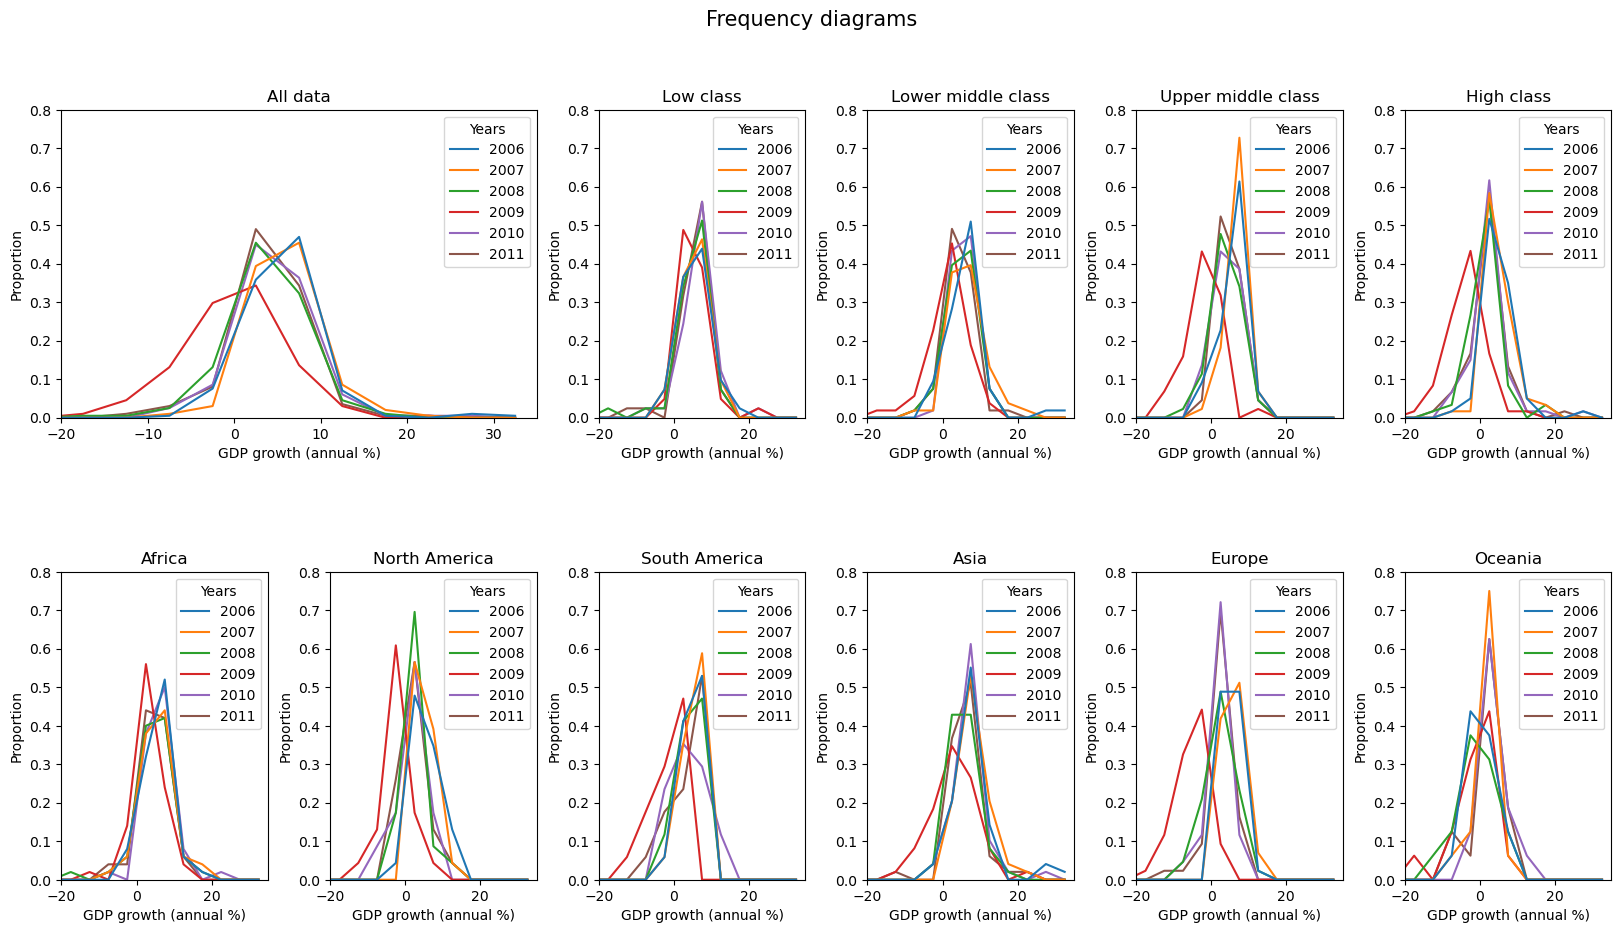

In [9]:
df = pd.melt(recession_data_1, id_vars=['Region Name', 'Income Group'], 
             value_vars=['2006', '2007', '2008', '2009', '2010', '2011'],var_name='Years', value_name='GDP growth (annual %)')
income_groups = ["Low", "Lower middle","Upper middle", "High"]
grid = (2,6)
fig=plt.figure(figsize=(20,10))
fig.set_facecolor("white")
colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green']
fig.suptitle("Frequency diagrams", fontsize=15)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
ax = plt.subplot2grid(grid, (0, 0), colspan=2)
sns.histplot(data=df,x='GDP growth (annual %)',bins=np.arange(-25, 40, 5),ax=ax,fill=False,
             element='poly',hue='Years',stat='proportion',common_norm=False)
ax.set_title('All data')
ax.set_ylim(0,0.8)
ax.set_xlim(-20,35)


for i in range(len(income_groups)):
    ax = plt.subplot2grid(grid, (0, i+2))
    data = df.where(df["Income Group"]==income_groups[i]).dropna()
    sns.histplot(data=data,x='GDP growth (annual %)',bins=np.arange(-25, 40, 5),ax=ax,fill=False,element='poly',
                 hue='Years',stat='proportion',common_norm=False,color=colors)
    ax.set_title(income_groups[i]+" class")
    ax.set_ylim(0,0.8)
    ax.set_xlim(-20,35)

reg = recession_data_1["Region Name"].unique()
for i in range(len(reg)):
    ax = plt.subplot2grid(grid, (1, i))
    data = df.where(df["Region Name"]==reg[i]).dropna()
    sns.histplot(data=data,x='GDP growth (annual %)',bins=np.arange(-25, 40, 5),ax=ax,fill=False,element='poly',
                 hue='Years',stat='proportion',common_norm=False,color=colors)
    ax.set_title(reg[i])
    ax.set_ylim(0,0.8)
    ax.set_xlim(-20,35)

In [10]:
temp = recession_data_1[years]
df = temp.describe()
df.loc['kurt'] = temp.kurtosis(axis=0)
df.loc['skew'] = temp.skew(axis=0)
df
# t.kurtosis(axis=0).to_list()

,2006,2007,2008,2009,2010,2011
count,198.00,198.00,198.00,198.00,198.00,198.00
mean,5.68,5.68,3.66,-0.10,4.29,3.81
std,4.66,4.13,4.49,5.81,4.50,4.35
min,-6.87,-6.68,-17.67,-17.57,-8.92,-12.71
25%,3.46,3.20,1.00,-3.74,1.72,1.64
50%,5.40,5.62,3.81,0.13,4.13,3.82
75%,7.56,7.70,6.24,3.50,6.71,6.32
max,34.50,25.00,17.80,21.39,25.12,21.62
kurt,10.16,2.88,3.17,0.93,3.44,3.11
skew,1.87,0.72,-0.60,-0.15,0.65,-0.11


In [20]:
recession_count_1 = pd.DataFrame(columns=intervals)
for i in years:
    a = list(map(lambda x: intervals.contains(x).astype(int), recession_data_1[i]))
    b = pd.DataFrame(a,columns=intervals).sum()
    recession_count_1.loc[i] = b
recession_count_1 = recession_count_1.rename_axis('Year')
recession_count_1 = recession_count_1.transpose()
recession_count_1

Year,2006,2007,2008,2009,2010,2011
"(-20, -15]",0,0,1,2,0,0
"(-15, -10]",0,0,1,9,0,2
"(-10, -5]",1,2,5,26,5,6
"(-5, 0]",15,6,26,59,17,17
"(0, 5]",71,78,90,68,89,96
"(5, 10]",93,90,64,27,72,68
"(10, 15]",14,17,9,6,12,7
"(15, 20]",1,4,2,0,1,1
"(20, 25]",0,1,0,1,1,1
"(25, 30]",2,0,0,0,1,0


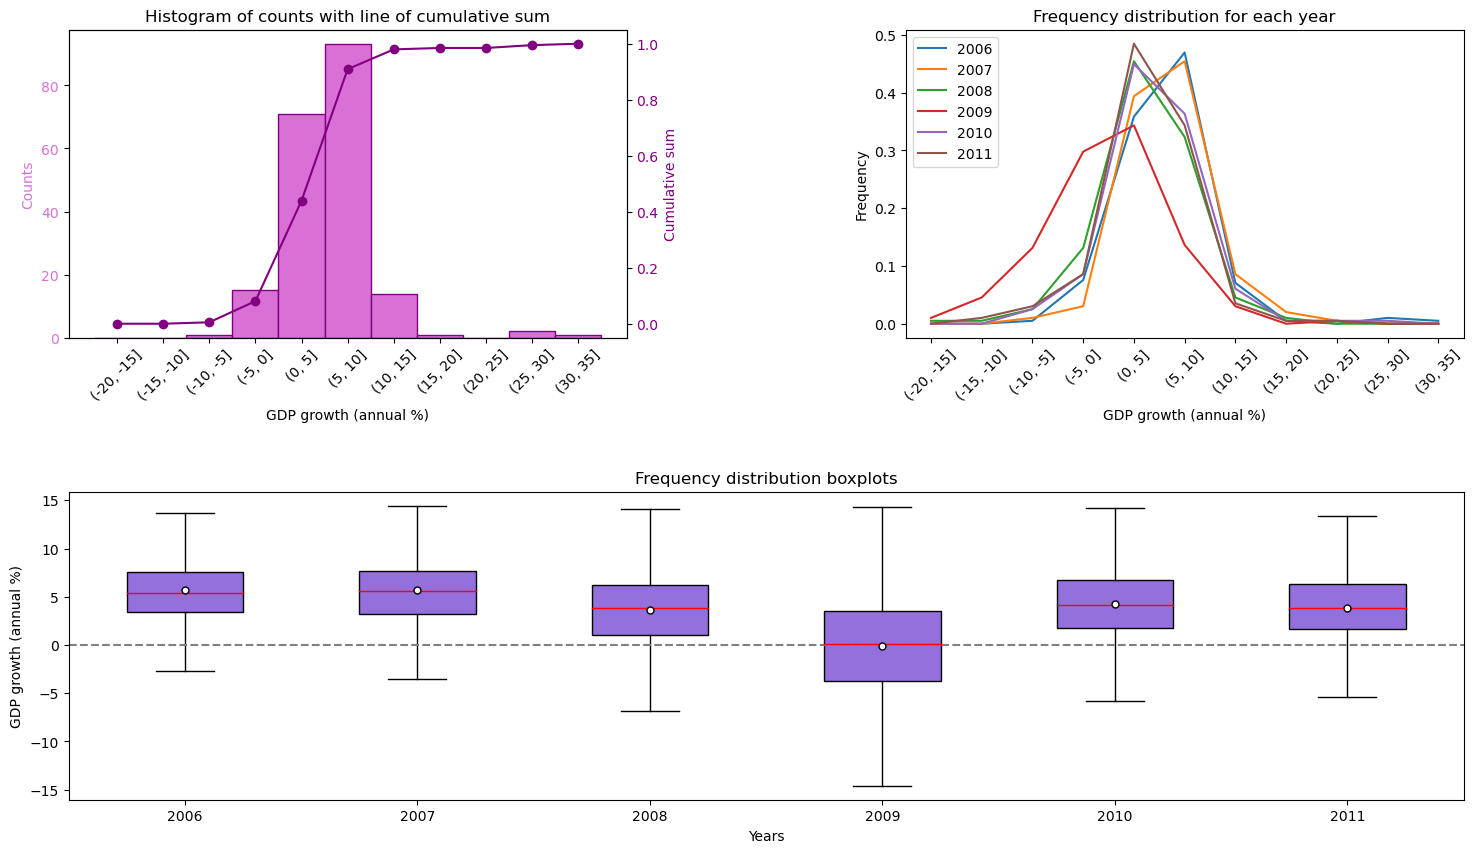

In [29]:
y = recession_count_1["2006"]
y = y/sum(y)
y = y.cumsum()

fig, ax=plt.subplots(2,2,figsize=(18,10))
plt.subplots_adjust(wspace=0.3,hspace=0.5)
fig.set_facecolor("white")
plt.subplots_adjust(wspace=0.5)
ax[0,0].bar(recession_count_1.index.astype(str), recession_count_1["2006"], color='orchid', edgecolor='purple', linewidth=1,width=1)
ax[0,0].set_title('Histogram of counts with line of cumulative sum')
ax[0,0].set_xlabel('GDP growth (annual %)')
ax[0,0].set_ylabel('Counts', color='orchid')
ax[0,0].tick_params(axis='y', labelcolor='orchid')
ax1 = ax[0,0].twinx()
ax1.plot(recession_count_1.index.astype(str), y, color='purple', marker='o')
ax1.set_ylabel('Cumulative sum', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax[0,0].set_xticks(recession_count_1.index.astype(str))
ax[0,0].set_xticklabels(recession_count_1.index.astype(str), rotation = 45)

for i in years:
    ax[0,1].plot(recession_count_1.index.astype(str),recession_count_1[i]/sum(recession_count_1[i]),label=i)
ax[0,1].set_xticks(recession_count_1.index.astype(str))
ax[0,1].set_xticklabels(recession_count_1.index.astype(str), rotation = 45)
ax[0,1].set_title('Frequency distribution for each year')
ax[0,1].set_xlabel('GDP growth (annual %)')
ax[0,1].set_ylabel('Frequency')
ax[0,1].legend(loc="upper left")

props = {"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"5"}
ax[1, 0].axis('off')
ax[1, 1].axis('off')
gs = fig.add_gridspec(2, 2, hspace=0.5)
ax1 = fig.add_subplot(gs[1,:])
l=[]
for i in years:
    stats = {'mean': df[i]['mean'], 'med': df[i]['50%'], 'q1': df[i]['25%'], 'q3': df[i]['75%'],
             'whislo': df[i]['25%']-1.5*(df[i]['75%']-df[i]['25%']),'whishi': df[i]['75%']+1.5*(df[i]['75%']-df[i]['25%']),
             'label':i}
    l.append(stats)
ax1.bxp(l, showfliers=False, patch_artist=True, boxprops=dict(facecolor='mediumpurple'),
        showmeans=True,meanprops=props,medianprops={"color": "red"})
ax1.set_title('Frequency distribution boxplots')
ax1.set_xlabel('Years')
ax1.set_ylabel('GDP growth (annual %)')
ax1.axhline(color='gray',linestyle='--')

# raise NotImplementedError()